In [4]:
#!git clone https://github.com/kaggle/docker-python
    
#!ls
#%cd docker-python

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set up

In [6]:
#!pip install --upgrade pandas

In [7]:
!pip install underthesea

     |████████████████████████████████| 7.5MB 5.0MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 245kB 38.0MB/s 
     |████████████████████████████████| 753.2MB 21kB/s 
     |████████████████████████████████| 747kB 31.1MB/s 
     |████████████████████████████████| 1.3MB 35.8MB/s 
     |████████████████████████████████| 901kB 27.9MB/s 
     |████████████████████████████████| 2.9MB 25.7MB/s 
     |████████████████████████████████| 1.1MB 24.7MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16184 sha256=75687f898684e3cbe702d99f703d8b4a0628b982da41b9f874664e1d56bf60bb
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.5.1 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.5.1 which is incompat

In [8]:
!pip install keras

In [9]:
!pip install torch

In [10]:
!pip install transformers

# Main

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(1234)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_log_error
from underthesea import word_tokenize
from sklearn.model_selection import train_test_split
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils
from gensim.models import KeyedVectors

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [12]:
!pip install xlrd

In [13]:
!pip install openpyxl==2.6.0

     |████████████████████████████████| 174kB 5.0MB/s 
  Created wheel for openpyxl: filename=openpyxl-2.6.0-py2.py3-none-any.whl size=243902 sha256=08cec0cb4dff2509b5672b568f8d7ff9445d898058977a43ebbe88d79b60cc88
  Stored in directory: /root/.cache/pip/wheels/5a/de/77/f07186146bd0337342dd8c86fa12441f4f9c59573c51dcce9d
Successfully built openpyxl
  Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [14]:
path= "/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/UIT-ViCTSD"
%cd /content/drive/MyDrive/Study/Scocial Media Data Mining/Dataset/UIT-ViCTSD/

/content/drive/MyDrive/Study/Scocial Media Data Mining/Dataset/UIT-ViCTSD


In [15]:
df_train = pd.read_csv("UIT-ViCTSD_train.csv")
df_dev = pd.read_csv("UIT-ViCTSD_valid.csv")
df_test = pd.read_csv("UIT-ViCTSD_test_text.csv")

In [16]:
num_labels = len(df_train["Constructiveness"].unique())
num_labels

2

In [17]:
df_train.Constructiveness

0       0
1       1
2       1
3       0
4       0
       ..
6995    0
6996    1
6997    1
6998    1
6999    0
Name: Constructiveness, Length: 7000, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train["Constructiveness"])

labels_train_encode = le.transform(df_train["Constructiveness"])
labels_dev_encode = le.transform(df_dev["Constructiveness"])
#labels_test_encode = le.transform(df_test["Constructiveness"])

In [19]:
from keras.utils.np_utils import to_categorical
labels_train = to_categorical(labels_train_encode, num_classes= num_labels)
#labels_test = to_categorical(labels_test_encode, num_classes= num_labels)
labels_dev = to_categorical(labels_dev_encode, num_classes= num_labels)

In [20]:
len(labels_dev)

2000

## Remove punctuation

In [21]:
import string
def cleaner_update(text):
    return text.translate(str.maketrans('','', string.punctuation))

In [22]:
clean_train = []
for i in range(0,len(df_train)):
    clean_train.append(cleaner_update(df_train['Comment'][i]))

len(clean_train)

7000

In [23]:
clean_dev = []
for i in range(0,len(df_dev)):
    clean_dev.append(cleaner_update(df_dev['Comment'][i]))

len(clean_dev)

2000

In [24]:
clean_test = []
for i in range(0,len(df_test)):
    clean_test.append(cleaner_update(df_test['Comment'][i]))
    
len(clean_test)

1000

## Tokenize Words

In [25]:
tokenize_df=[]
for x in clean_test:
    tokenize_df.append(word_tokenize(x))
    
for x in clean_train:
    tokenize_df.append(word_tokenize(x))
    
for x in clean_dev:
    tokenize_df.append(word_tokenize(x))
    
len(tokenize_df) ## >> len= 6927 là kích thước của dataset do tokenize gọp lại của 3 tập

10000

## Count Words

In [26]:
words=[]
for m in range(0,len(tokenize_df)):
    for n in range(0,len(tokenize_df[m])):
        words.append(tokenize_df[m][n])

len(words)

241138

## Visualize frequency of word (used for stopwords)

In [27]:
df_Count = pd.DataFrame(words,columns=['word'])
df_Count['Num']= 1

In [28]:
df_GroupBy=df_Count.groupby('word').count()
df_GroupBy.sort_values('Num',ascending=False,inplace=True)

In [29]:
filename = '/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/vietnamese-stopwords.txt'
data = pd.read_csv(filename,names=['word'])
data

,word
0,a lô
1,a ha
2,ai
3,ai ai
4,ai nấy
...,...
1937,ừ nhé
1938,ừ thì
1939,ừ ào
1940,ừ ừ


In [30]:
list_stopwords = data['word']
myarray = np.asarray(list_stopwords)
myarray

array(['a lô', 'a ha', 'ai', ..., 'ừ ào', 'ừ ừ', 'ử'], dtype=object)

In [31]:
def remove_stopword(text):
    text2=''
    for x in text:
        if x in myarray:
            text2+=""
        else:
            text2+=x+ " "
    return text2

storage=[]
for x in range(0,len(tokenize_df)):
    storage.append(remove_stopword(tokenize_df[x]))
    
print(len(storage))
#print(storage)

10000


## Split data

In [32]:
x_train = pd.Series(clean_train)
y_train = pd.Series(df_train['Constructiveness'])

x_dev = pd.Series(clean_dev)
y_dev = pd.Series(df_dev['Constructiveness'])

x_test = pd.Series(clean_test)
#y_test = pd.Series(df_test['Constructiveness'])

print(len(df_train))
print(len(x_train))

7000
7000


# Training build_vocav with 2 method of skipgam and CBOW

In [33]:
def labelize_text_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

In [34]:
all_x = pd.concat([x_train])
all_x_w2v = labelize_text_ug(all_x, 'all')
len(all_x_w2v)

7000

### CBOW

In [35]:
cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)

model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 7000/7000 [00:00<00:00, 984314.34it/s]


In [36]:
%%time
for epoch in range(30):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha

100%|██████████| 7000/7000 [00:00<00:00, 942419.21it/s]


CPU times: user 16.3 s, sys: 141 ms, total: 16.5 s
Wall time: 9.42 s


### SG

In [37]:
model_ug_sg = Word2Vec(sg=1, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 7000/7000 [00:00<00:00, 841674.40it/s]


In [38]:
%%time
for epoch in range(30):
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha

100%|██████████| 7000/7000 [00:00<00:00, 1351879.92it/s]


CPU times: user 31.5 s, sys: 153 ms, total: 31.6 s
Wall time: 17.3 s


## Save results

In [39]:
model_ug_cbow.save(path + 'w2v_model_ug_cbow.word2vec')
model_ug_sg.save(path + 'w2v_model_ug_sg.word2vec')

## Get Keyed Vectors

In [40]:
model_ug_cbow = KeyedVectors.load(path + 'w2v_model_ug_cbow.word2vec')
model_ug_sg = KeyedVectors.load(path + 'w2v_model_ug_sg.word2vec')

#### Appending cbow and sg for better result

In [41]:
# Demo
dictions= {}
dictions['a'] = np.append([3, 7], [1, 2])
dictions['b'] = 4
dictions['bb'] = 15
len(dictions)
dictions

{'a': array([3, 7, 1, 2]), 'b': 4, 'bb': 15}

In [42]:
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys(): # model_ug_cbow.wv.index_to_key is all keyed after modelize in dataset
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w]) #model_ug_cbow.wv[w] is a tensor
print('Found %s word vectors.' % len(embeddings_index))

embeddings_index['không']

Found 5624 word vectors.


array([-0.04154682, -0.19434334, -0.04786525, -0.025138  , -0.61264634,
        0.11161296,  0.4155659 , -0.9074226 ,  0.23434529,  0.2653192 ,
       -1.2643297 ,  0.6854025 ,  0.5375792 ,  0.33186063, -0.04957185,
       -0.99982697,  0.16332744, -0.05800353, -0.3799042 , -0.42597386,
        0.21327059, -0.12250022,  0.315819  ,  0.3060042 ,  0.48157895,
       -0.4097245 ,  0.33524075, -1.3729342 , -0.5582539 ,  0.6591181 ,
       -0.8470815 ,  0.19745336,  0.28820023, -0.45588222,  0.13026205,
        0.48018646, -0.00964183,  0.30758727,  0.5115241 , -0.5490117 ,
       -0.8870519 ,  0.28725728, -0.5080784 ,  0.804786  , -0.43278104,
        0.41611326, -0.5567733 ,  1.0049694 ,  0.5448769 ,  0.972304  ,
       -0.24917944,  1.0969812 , -0.28658265,  0.13789785,  0.3052714 ,
       -0.47571403, -0.42693803,  0.567458  , -0.10055128, -0.41106322,
        0.37718746, -0.34447008,  0.08803758, -0.24285813,  0.5424032 ,
       -0.16607162,  0.3795546 , -0.00505126, -0.14396046,  0.58

## Vectorize words into numberic (float)

In [43]:
tokenizer = keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
tokenizer.fit_on_texts(x_train)
import pickle

# saving
with open('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/UIT-ViCTSD/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

x_train

0                                          Thật tuyệt vời
1       mỹ đã tuột dốc quá nhiều rồi giờ muốn vực dậy ...
2       tôi thấy người lái xe hơi bấm còi mới là người...
3       Coi dịch là giặc Đã mang tên đó mà xâm nhập VN...
4       Thương các bé quá Các con còn quá nhỏ mà đã ph...
                              ...                        
6995    đọc tin mà đau lòng quáthảm nạn cứ xãy ra hoài...
6996    Nên mua bạn nhé Để bảo vệ sức khỏe bạn trong 3...
6997    Nên ra luật người sử dụng ma túy cũng phạm tội...
6998    Mua Fadil đủ lăn bánh Nếu thấy đắt thì đi Morn...
6999               2 kẻ này phải xử lý mạnh Thật căm phẫn
Length: 7000, dtype: object

In [44]:
sequences_digit = tokenizer.texts_to_sequences(x_train)

### Take a max length of vector (reason of all inout have to be in a same size of matrix)

In [45]:
length = []
for x in x_train:
    length.append(len(x.split()))
for x in x_dev:
    length.append(len(x.split()))
for x in x_test:
    length.append(len(x.split()))
    
max(length)

342

In [46]:
x_train_seq = pad_sequences(sequences_digit, maxlen=155)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (7000, 155)


In [47]:
sequences_val = tokenizer.texts_to_sequences(x_dev)
x_val_seq = pad_sequences(sequences_val, maxlen=155)
print('Shape of data tensor:', x_val_seq.shape)

Shape of data tensor: (2000, 155)


In [48]:
sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=155)
print('Shape of data tensor:', x_test_seq.shape)

Shape of data tensor: (1000, 155)


In [49]:
num_words = 10000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# LSTM - CNN

### Validating on DataSet - Dev

In [50]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [51]:
x_train_seq.shape

(7000, 155)

In [52]:
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import Model
from keras import backend as K
from keras.models import Sequential
from keras.layers.embeddings import Embedding

In [53]:
%cd /content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/UIT-ViCTSD

/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/UIT-ViCTSD


In [54]:
model_lstm_cnn = Sequential()
e = Embedding(10000, 200, weights=[embedding_matrix], input_length=150, trainable=True)
model_lstm_cnn.add(e)
model_lstm_cnn.add(LSTM(300,return_sequences=True))
model_lstm_cnn.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_lstm_cnn.add(GlobalMaxPooling1D())
model_lstm_cnn.add(Dropout(0.2))
model_lstm_cnn.add(Dense(256, activation='relu'))
model_lstm_cnn.add(Dense(num_labels, activation='sigmoid'))
model_lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])
filepath="LSTM_CNN_best_weights.{epoch:02d}-{val_acc:.41f}.hdf5"
#model_lstm_cnn.load_weights("/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/VSMEC/LSTM_CNN_best_weights.06-0.54227405786514282226562500000000000000000.hdf5")
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#history_lstm_cnn=model_lstm_cnn.fit(x_train_seq, labels_train, batch_size=40, epochs=10,
#                     validation_data=(x_val_seq, labels_dev),verbose=2, callbacks=[checkpoint])

In [55]:
assert False

AssertionError: ignored

In [ ]:
model_lstm_cnn.summary()

### Test

In [56]:
import seaborn as sn
import matplotlib.pyplot as plt

In [57]:
model_lstm_cnn.load_weights('LSTM_CNN_best_weights.02-0.80800002813339233398437500000000000000000.hdf5')

In [58]:
y_pred_classify = model_lstm_cnn.predict(x_test_seq)
y_pred = y_pred_classify.argmax(axis=-1)
pd.DataFrame({'Constructiveness_pred': y_pred}).to_csv('LSTM_ViCTSD_Constructiveness.csv', index= False)

In [60]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# Danh gia mo hinh
y_true = labels_test_encode
y_pred_classify = model_lstm_cnn.predict(x_test_seq)
y_pred = y_pred_classify.argmax(axis=-1)

cf = confusion_matrix(y_true, y_pred, labels= pd.Series(y_true).unique())

print(cf)
print("accuracy: " + str(accuracy_score(y_true, y_pred)))
print("F1 - macro: " + str(f1_score(y_true, y_pred, average='macro')))
target_names = pd.Series(y_test).astype(str).unique()
print('Classification report in Training set')
print(classification_report(y_true, y_pred, labels= pd.Series(y_true).unique(), target_names=target_names))

NameError: ignored

In [59]:
# Ve ma tran nham lan
plt.figure(figsize=(15,15))
df_cm = pd.DataFrame(cf, index = pd.Series(y_test).unique(),
                  columns = pd.Series(y_test).unique())

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'15'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

sns.heatmap(df_cm, annot=True, ax=ax, cmap="Blues", fmt="g");  
# sn.heatmap(df_cm, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 10})

NameError: ignored

<Figure size 1080x1080 with 0 Axes>

# Đánh giá kết quả

In [61]:
import pandas as pd
labelTest= pd.read_json("/content/drive/MyDrive/Study/Scocial Media Data Mining/Dataset/UIT-ViCTSD/LabelTest.json")
labelTest.head()

,,id,comment,constructiveness,toxicity,title,topic
0,0,6252,Người ăn không hết kẻ lần chẳng ra,0,1,28 năm chịu đựng bộ ngực khổng lồ,SucKhoe
1,1,4684,Nhiều người cứ nghĩ đạp xe là văn minh. haizzzz,0,1,Cả trăm người đạp xe thể dục bịt kín đường,OtoXemay
2,2,1731,Rất văn hoá,0,0,Cô gái được bố nhắn nhủ ba từ mỗi ngày,GiaoDuc
3,3,4742,Đời ta ba mươi đời nó. Mua chiếc xe cũng chỉ p...,0,0,Các loại phụ kiện ôtô đại lý hay chào khách,OtoXemay
4,4,4521,"Tước bằng lái vĩnh viễn đi. Chạy lếu láo thật,...",1,1,Ba người thoát chết dưới bánh xe bồn,OtoXemay


In [62]:
# Đọc file labels predict lên
labelPred= pd.read_csv('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/UIT-ViCTSD/LSTM_ViCTSD_Constructiveness.csv')
labelPred.head()

,Constructiveness_pred
0,0
1,0
2,0
3,1
4,1


In [63]:
# Đánh giá:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# Danh gia mo hinh
y_true = labelTest.constructiveness
#y_pred_classify = model_lstm_cnn.predict(x_test_seq)
#y_pred = y_pred_classify.argmax(axis=-1)
y_pred = labelPred

cf = confusion_matrix(y_true, y_pred, labels= pd.Series(y_true).unique())

print(cf)
print("accuracy: " + str(accuracy_score(y_true, y_pred)))
print("F1 - macro: " + str(f1_score(y_true, y_pred, average='macro')))
target_names = pd.Series(y_true).astype(str).unique()
print('Classification report in Training set')
print(classification_report(y_true, y_pred, labels= pd.Series(y_true).unique(), target_names=target_names))

[[521 115]
 [ 79 285]]
accuracy: 0.806
F1 - macro: 0.7945576848133651
Classification report in Training set
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       636
           1       0.71      0.78      0.75       364

    accuracy                           0.81      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.81      0.81      0.81      1000



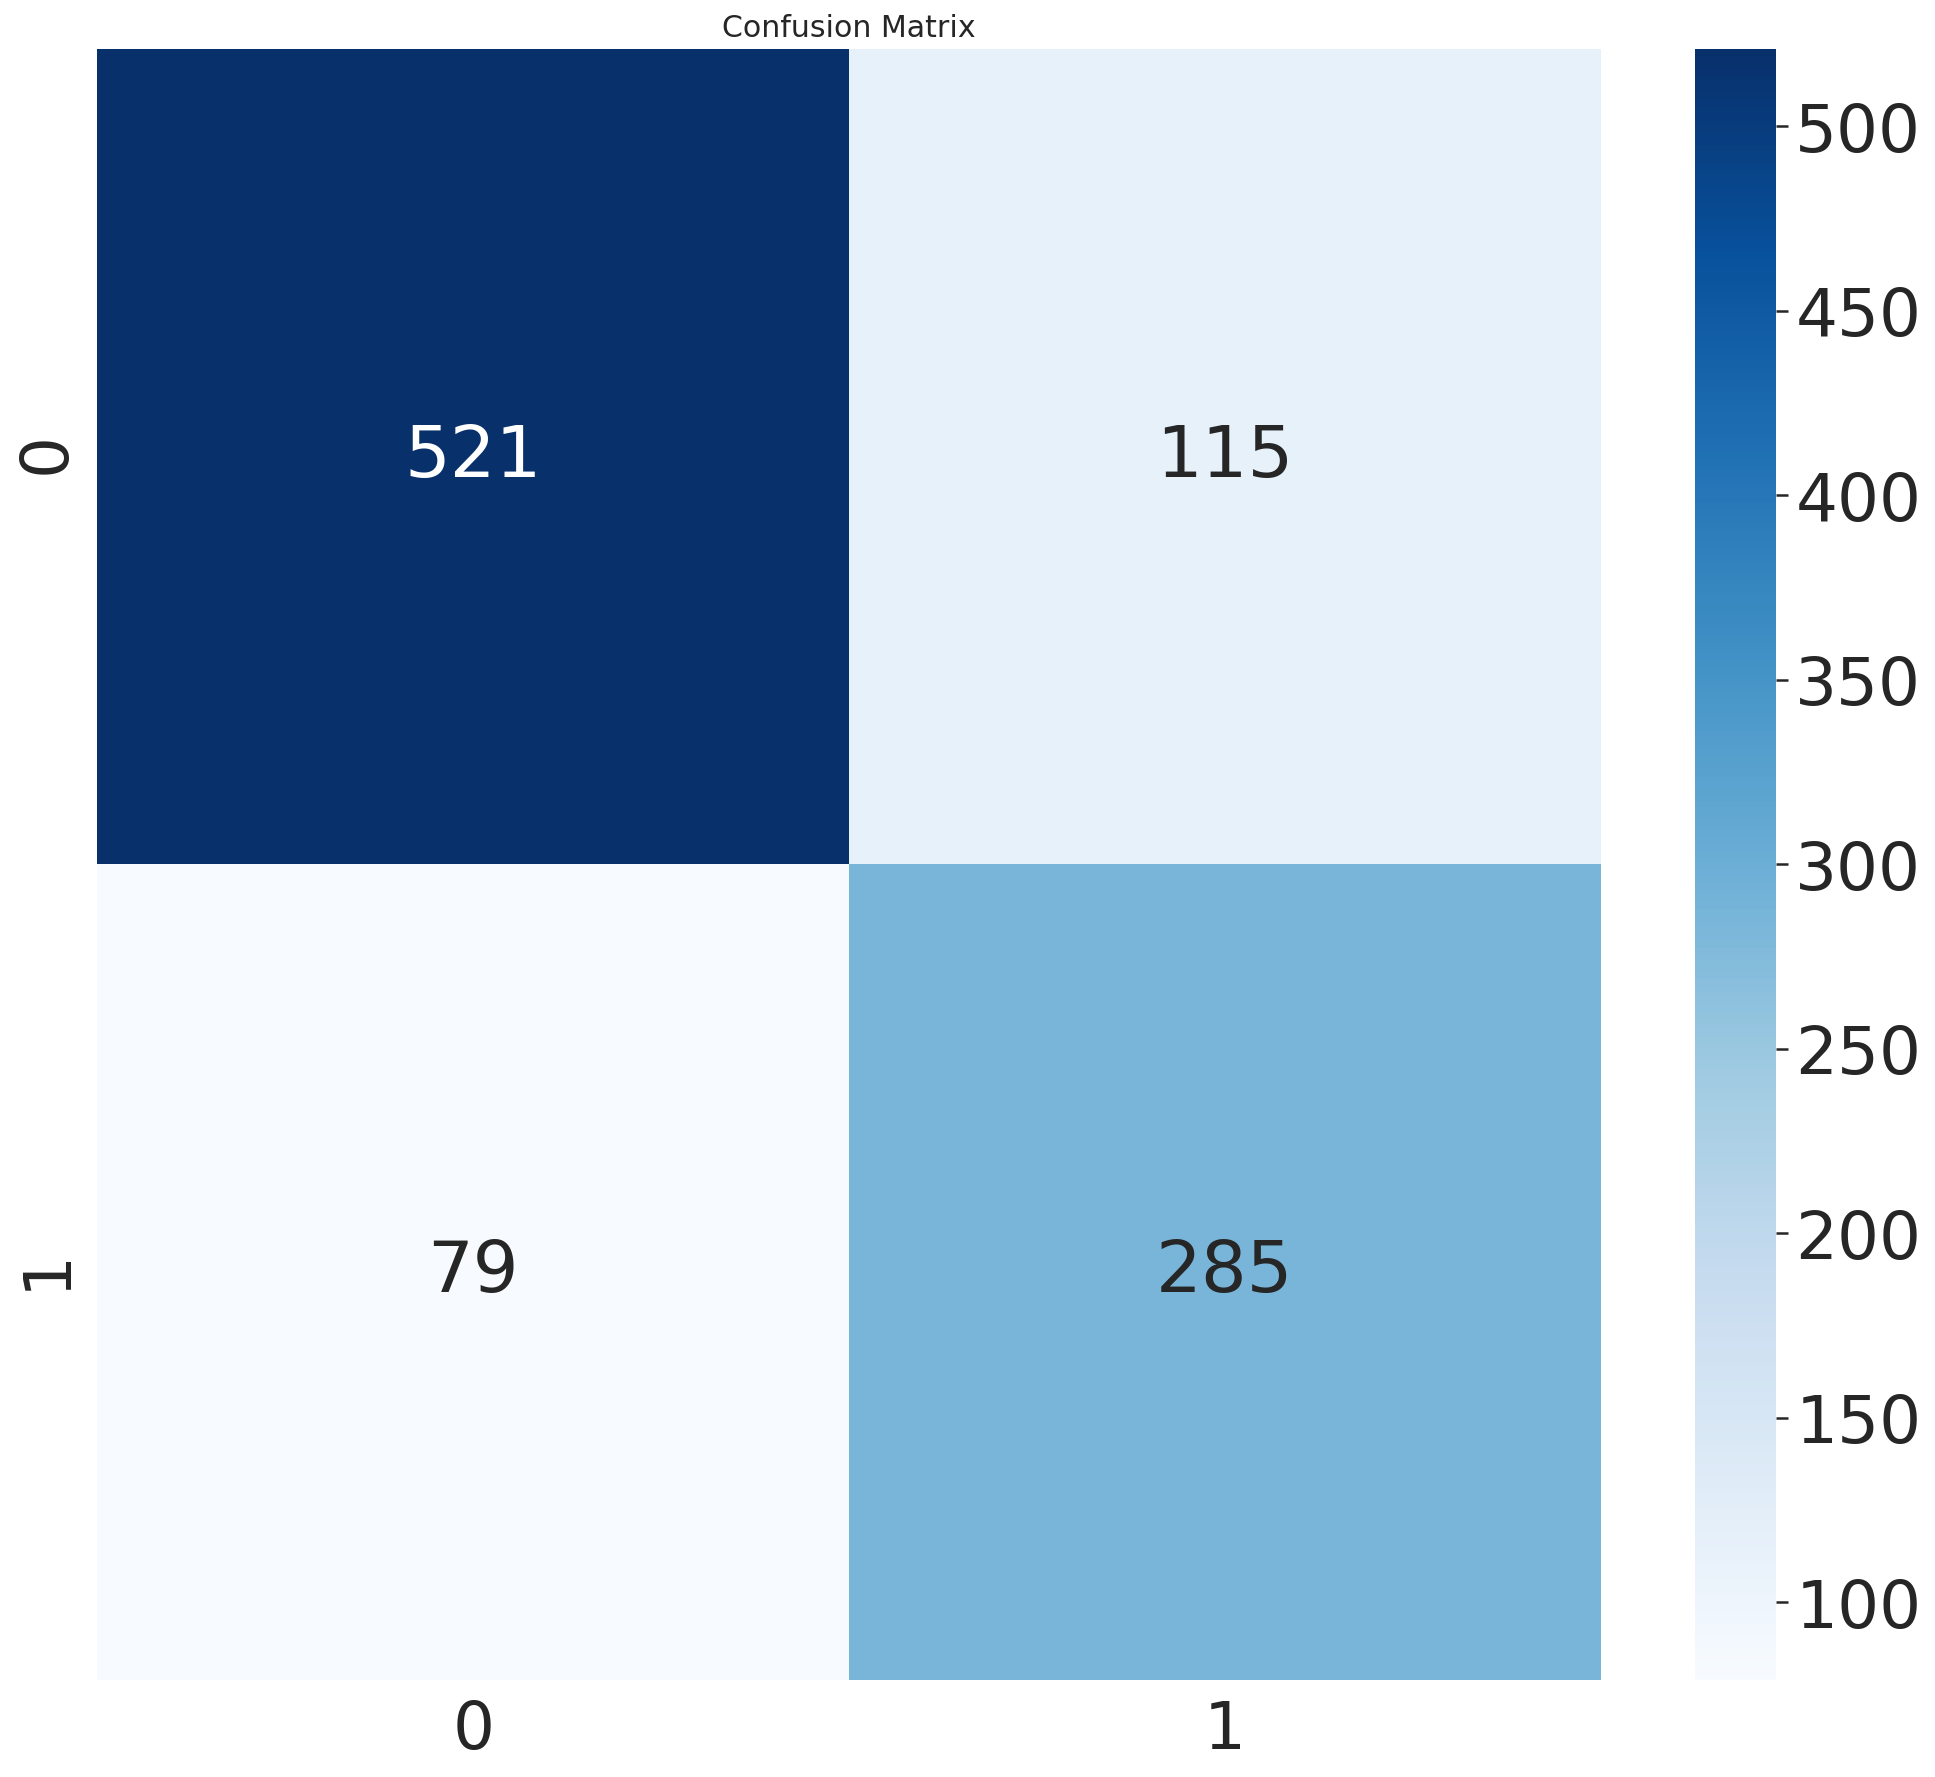

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ve ma tran nham lan
plt.figure(figsize=(15,15))
df_cm = pd.DataFrame(cf, index = target_names,
                  columns = target_names)

ax = plt.subplot()
sns.set(font_scale=3.0) # Adjust to fit

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'15'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

sns.heatmap(df_cm, annot=True, ax=ax, cmap="Blues", fmt="g");  
sn.heatmap(df_cm, annot=False, cmap="Blues",fmt='g', cbar=False, annot_kws={"size": 10})

# Demo Kết Quả Dự Báo

## Phụ

In [ ]:
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import Model
from keras import backend as K
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras

import pandas as pd
import numpy as np

from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

import string
def cleaner_update(text):
    return text.translate(str.maketrans('','', string.punctuation))

In [ ]:
import pickle
# loading
with open('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/UIT-ViCTSD/embeddings_index.pickle', 'rb') as handle:
    embeddings_index = pickle.load(handle)

with open('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/UIT-ViCTSD/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
num_words = 10000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

model_lstm_cnn = Sequential()
e = Embedding(10000, 200, input_length=150, trainable=True)
model_lstm_cnn.add(e)
model_lstm_cnn.add(LSTM(300,return_sequences=True))
model_lstm_cnn.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_lstm_cnn.add(GlobalMaxPooling1D())
model_lstm_cnn.add(Dropout(0.2))
model_lstm_cnn.add(Dense(256, activation='relu'))
model_lstm_cnn.add(Dense(2, activation='sigmoid'))
model_lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])

model_lstm_cnn.load_weights('/content/drive/MyDrive/Study/Scocial Media Data Mining/SourceCode/Hieu_LSTM/UIT-ViCTSD/LSTM_CNN_best_weights.02-0.80800002813339233398437500000000000000000.hdf5')

## Test Demo

In [ ]:
# input
input1 = input()

x_demo = pad_sequences(tokenizer.texts_to_sequences(pd.Series(cleaner_update(input1))), maxlen=155)
y_pred_classify = model_lstm_cnn.predict(x_demo).argmax(axis=-1)

# output
print("Kết quả dự báo: ", y_pred_classify)